# **Final Project**

##**Problem stament :**     

The widespread dissemination of fake news and propaganda presents serious societal risks, including the erosion of public trust, political polarization, manipulation of elections, and the spread of harmful misinformation during crises such as pandemics or conflicts. From an NLP perspective, detecting fake news is fraught with challenges. Linguistically, fake news often mimics the tone and structure of legitimate journalism, making it difficult to distinguish using surface-level features. The absence of reliable and up-to-date labeled datasets, especially across multiple languages and regions, hampers the effectiveness of supervised learning models. Additionally, the dynamic and adversarial nature of misinformation means that malicious actors constantly evolve their language and strategies to bypass detection systems. Cultural context, sarcasm, satire, and implicit bias further complicate automated analysis. Moreover, NLP models risk amplifying biases present in training data, leading to unfair classifications and potential censorship of legitimate content. These challenges underscore the need for cautious, context-aware approaches, as the failure to address them can inadvertently contribute to misinformation, rather than mitigate it.



Use datasets in link : https://drive.google.com/drive/folders/1mrX3vPKhEzxG96OCPpCeh9F8m_QKCM4z?usp=sharing
to complete requirement.

## **About dataset:**

* **True Articles**:

  * **File**: `MisinfoSuperset_TRUE.csv`
  * **Sources**:

    * Reputable media outlets like **Reuters**, **The New York Times**, **The Washington Post**, etc.

* **Fake/Misinformation/Propaganda Articles**:

  * **File**: `MisinfoSuperset_FAKE.csv`
  * **Sources**:

    * **American right-wing extremist websites** (e.g., Redflag Newsdesk, Breitbart, Truth Broadcast Network)
    * **Public dataset** from:

      * Ahmed, H., Traore, I., & Saad, S. (2017): "Detection of Online Fake News Using N-Gram Analysis and Machine Learning Techniques" *(Springer LNCS 10618)*



## **Requirement**

A team consisting of three members must complete a project that involves applying the methods learned from the beginning of the course up to the present. The team is expected to follow and document the entire machine learning workflow, which includes the following steps:

1. **Data Preprocessing**: Clean and prepare the dataset,etc.

2. **Exploratory Data Analysis (EDA)**: Explore and visualize the data.

3. **Model Building**: Select and build one or more machine learning models suitable for the problem at hand.

4. **Hyperparameter set up**: Set and adjust the model's hyperparameters using appropriate methods to improve performance.

5. **Model Training**: Train the model(s) on the training dataset.

6. **Performance Evaluation**: Evaluate the trained model(s) using appropriate metrics (e.g., accuracy, precision, recall, F1-score, confusion matrix, etc.) and validate their performance on unseen data.

7. **Conclusion**: Summarize the results, discuss the model's strengths and weaknesses, and suggest possible improvements or future work.





## **Import Libraries and Data**

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

In [ ]:
FAKE_PATH = 'D:\\Workspace\\NLP\\At school\\Final project\\datasets\\DataSet_Misinfo_FAKE.csv'
TRUE_PATH = 'D:\\Workspace\\NLP\\At school\\Final project\\datasets\\DataSet_Misinfo_TRUE.csv'

df_fake = pd.read_csv(FAKE_PATH)
df_true = pd.read_csv(TRUE_PATH)

## **Data Preprocessing**

In [ ]:
df_fake.head(), df_true.head()

(   Unnamed: 0                                               text
 0           0  Donald Trump just couldn t wish all Americans ...
 1           1  House Intelligence Committee Chairman Devin Nu...
 2           2  On Friday, it was revealed that former Milwauk...
 3           3  On Christmas day, Donald Trump announced that ...
 4           4  Pope Francis used his annual Christmas Day mes...,
    Unnamed: 0                                               text
 0           0  The head of a conservative Republican faction ...
 1           1  Transgender people will be allowed for the fir...
 2           2  The special counsel investigation of links bet...
 3           3  Trump campaign adviser George Papadopoulos tol...
 4           4  President Donald Trump called on the U.S. Post...)

#### **1. Remove uneccessary columns & Label for the dataset**

Có thể thấy ở 2 cột của bộ dữ liệu đang có cùng 1 cột dư thừa và không sử dụng đến **"Unnamed: 0"**, nên ta sẽ loại bỏ cột này ở cả 2 bộ dữ liệu. <br>
Thứ 2 là bộ dữ liệu mặc dù đã được chia ra fake và real news ở mỗi tệp nhưng chưa được gán nhãn. Vì vậy ta sẽ thực hiện việc gán nhãn cho bộ dữ liệu, với dữ liệu Fake thì sẽ là 0 và Real sẽ là 1

In [ ]:
# Remove uneccessary columns in 2 datasets
df_fake.drop('Unnamed: 0', axis=1, inplace=True)
df_true.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Label for 2 datasets
df_fake['label'] = 0
df_true['label'] = 1

# Merge 2 datasets in to 1 to handle
df = pd.concat([df_fake, df_true], ignore_index=True)

In [159]:
df.sample(3)

,text,label
47067,President Donald Trump is still looking for a ...,1
73469,"JUBA, South Sudan — Armed clashes between t...",1
43646,President Donald Trump called on the U.S. Post...,1


In [160]:
print('The shape of the data:', df.shape)

The shape of the data: (78617, 2)


#### **2. Check missing and duplicated values**

Kiểm tra giá trị missing

In [161]:
df.isnull().sum().sort_values(ascending=False)

text     29
label     0
dtype: int64

Ở đây đang có 29 dữ liệu missing, chắc chắn là sẽ bỏ đi các giá trị này. Thêm vào đó, có thể sẽ có 1 vài dòng chưa giá trị **blank space ' '**, mà những giá trị như vậy thì pandas nó không đọc được là giá trị null nên vì vậy sẽ phải chuyển các giá trị **blank space ' ' thành giá trị null** và loại bỏ đi.

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78617 entries, 0 to 78616
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    78588 non-null  object
 1   label   78617 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [163]:
# Function to convert blank space to null value
def blank_to_nan(df):
    tmp = []
    for item in df:
        if item == '':
            tmp.append(np.nan)
        else:
            tmp.append(item)
    return tmp

In [164]:
text = blank_to_nan(df['text'])

In [165]:
tmp = pd.DataFrame({'text': text, 'label': df['label']})

In [166]:
df = tmp.dropna()

In [167]:
print('The shape of data after dropping null values:', df.shape)

The shape of data after dropping null values: (78588, 2)


Kiểm tra giá trị duplicated

In [168]:
df['clean_text'] = df['text'].str.lower().str.strip()

duplicated_texts = df[df.duplicated(subset='clean_text', keep=False)]

C:\Users\ngmin\AppData\Local\Temp\ipykernel_18612\571764310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['text'].str.lower().str.strip()


In [169]:
duplicated_texts.head()

,text,label,clean_text
9087,Barbra Streisand was an Obama sycophant and on...,0,barbra streisand was an obama sycophant and on...
9088,Everyone suspected the sketchy Steele Dossier ...,0,everyone suspected the sketchy steele dossier ...
9089,It s been said that good fences make good neig...,0,it s been said that good fences make good neig...
9091,"Friday on MSNBC, climate activist Bill Nye war...",0,"friday on msnbc, climate activist bill nye war..."
9093,"#JokeNewsAfter record, cold temperatures were ...",0,"#jokenewsafter record, cold temperatures were ..."


In [170]:
print("The shape of data:", df.shape)

# Remove duplicated texts 
df = df.drop_duplicates(subset = 'clean_text', keep = 'first').drop(columns = 'clean_text')

print("The shape of data after dropping duplicates:", df.shape)

The shape of data: (78588, 3)
The shape of data after dropping duplicates: (68600, 2)


#### **3. Text Cleaning và Normalize text to correct format**

Máy tính không thể học được hết tất cả các từ trong nhiều đoạn văn bản nếu chúng chứa quá nhiều từ ngữ hoặc ký tự không liên quan đến ngữ nghĩa chính. Vì vậy, cần phải xử lý loại bỏ những ký tự không phải là văn bản, đồng thời lọc bớt các từ có khả năng gây nhiễu – những từ tuy xuất hiện với tần suất cao nhưng lại không mang nhiều giá trị phân tích, chẳng hạn như “the”, “and”, “of”, v.v. <br>

Bên cạnh đó, để giúp mô hình hiểu rõ hơn nội dung thực sự của văn bản, ta cần đưa các từ về dạng chuẩn của chúng – đó là lý do kỹ thuật lemmatization trở nên cần thiết. Thay vì để mô hình phải học riêng lẻ các biến thể của một từ như “running”, “ran”, hay “runs”, ta chuẩn hóa chúng về cùng một dạng gốc có nghĩa – điều này giúp giảm số lượng từ cần học và tăng khả năng khái quát cho mô hình.

In [171]:
# Import processing text libraries
import re
import nltk
from nltk.corpus import stopwords
from unidecode import unidecode
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from textblob import Word

# Download NLTK data
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ngmin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ngmin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ngmin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [172]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r"http\S+|www\S+|<.*?>", "", text)  # Remove URLs/HTML
    text = re.sub(r"[^a-zA-Z\s]", "", text)           # Keep only letters
    text = unidecode(text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(tokens)

In [173]:
df['clean_text'] = df['text'].apply(preprocess_text)
df['text_length'] = df['clean_text'].apply(lambda x: len(x.split()))
df['char_length'] = df['clean_text'].apply(len)

In [174]:
df.head()

,text,label,clean_text,text_length,char_length
0,Donald Trump just couldn t wish all Americans ...,0,donald trump wish american happy new year leav...,258,1792
1,House Intelligence Committee Chairman Devin Nu...,0,house intelligence committee chairman devin nu...,178,1367
2,"On Friday, it was revealed that former Milwauk...",0,friday revealed former milwaukee sheriff david...,315,2343
3,"On Christmas day, Donald Trump announced that ...",0,christmas day donald trump announced would bac...,243,1780
4,Pope Francis used his annual Christmas Day mes...,0,pope francis used annual christmas day message...,211,1426


In [175]:
df.describe()

,label,text_length,char_length
count,68600.000000,68600.000000,68600.000000
mean,0.503294,268.357638,1963.945918
std,0.499993,322.604590,2332.720502
min,0.000000,0.000000,0.000000
25%,0.000000,81.000000,590.750000
50%,1.000000,199.000000,1461.000000
75%,1.000000,335.000000,2468.000000
max,1.000000,12126.000000,80915.000000


## **Explore Data Analysis (EDA)**

#### **View label distribution**

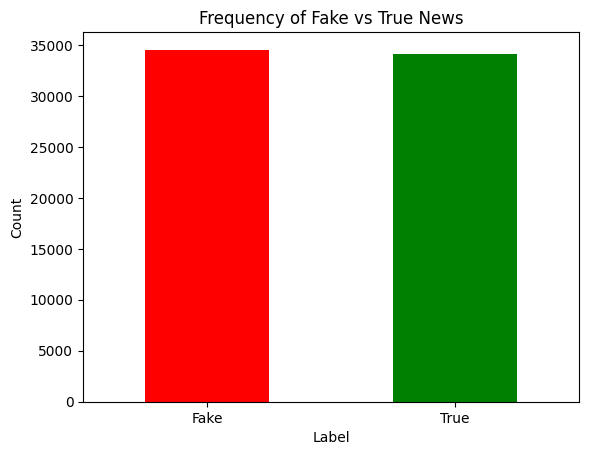

In [176]:
df['label'].value_counts().plot(kind = 'bar', color = ['red', 'green'])
plt.title("Frequency of Fake vs True News")
plt.xticks(ticks = [0, 1], labels = ['Fake', 'True'], rotation = 0)
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [177]:
percent_real = len(df[df['label'] == 1 ])/ len(df)*100
percent_fake = len(df[df['label'] == 0])/ len(df)*100
print(f'There are {len(df)} articles. \n{percent_real:.2f}% are true articles and {percent_fake:.2f}% are fake articles.')

There are 68600 articles. 
50.33% are true articles and 49.67% are fake articles.


#### **Text length analysis**

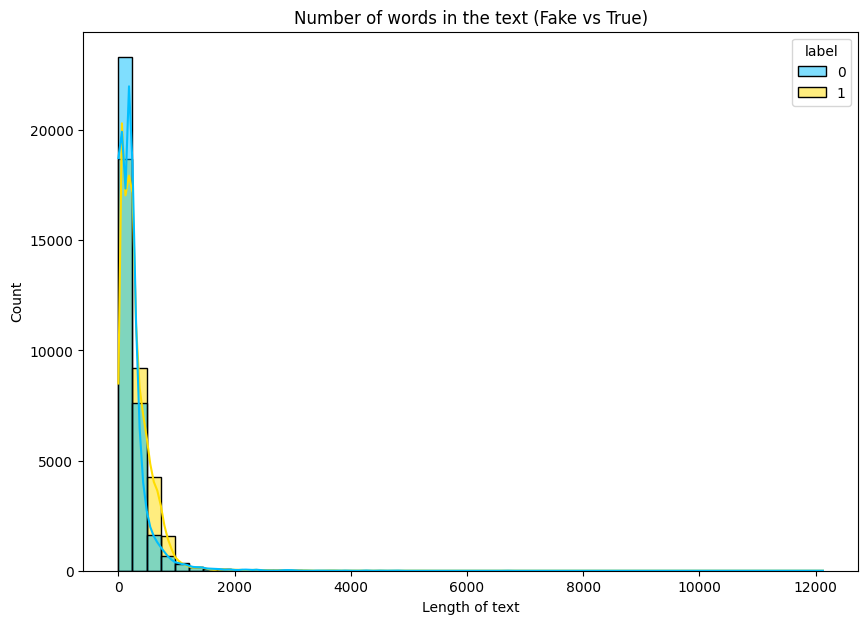

         count        mean         std  min    25%    50%    75%      max
label                                                                    
0      34074.0  232.027205  332.651944  0.0   51.0  179.0  276.0  12126.0
1      34526.0  304.212449  308.206215  0.0  106.0  227.0  412.0   7656.0


In [178]:
plt.figure(figsize = (10, 7))
sns.histplot(data = df, x = 'text_length', hue = 'label', bins = 50, kde = True)
plt.title("Number of words in the text (Fake vs True)")
plt.xlabel("Length of text")
plt.ylabel("Count")
plt.show()

print(df.groupby('label')['text_length'].describe())

Đầu tiên có thể thấy rằng phân bố nhãn dữ liệu (Fake vs True) không hề chênh lệch nhau nhiều, chứng tỏ bộ dữ liệu đang cân bằng.<br>

Thứ hai sau khi phân tích độ dài văn bản, thì có thể thấy rằng **Fake news** thường ngắn hơn nhưng có 1 vài trường hợp ngoại lệ thì dài; **True news** dài hơn và ổn định hơn về độ dài. Độ dài văn bản có thể là đặc trưng hữu ích để phân biệt.

#### **Top words that appear frequently**

In [179]:
from collections import Counter
from wordcloud import WordCloud

def plot_common_words(df, label_val, color):
    texts = df[df['label'] == label_val]['clean_text']
    all_words = " ".join(texts).split()
    common = Counter(all_words).most_common(50)
    common_words = dict(common)
    
    wc = WordCloud(width = 800, height = 400, background_color = 'white', colormap = color)
    wc.generate_from_frequencies(common_words)
    
    plt.figure(figsize = (10, 6))
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.title("Top words appear most - " + ("Fake" if label_val == 0 else "True"))
    plt.show()

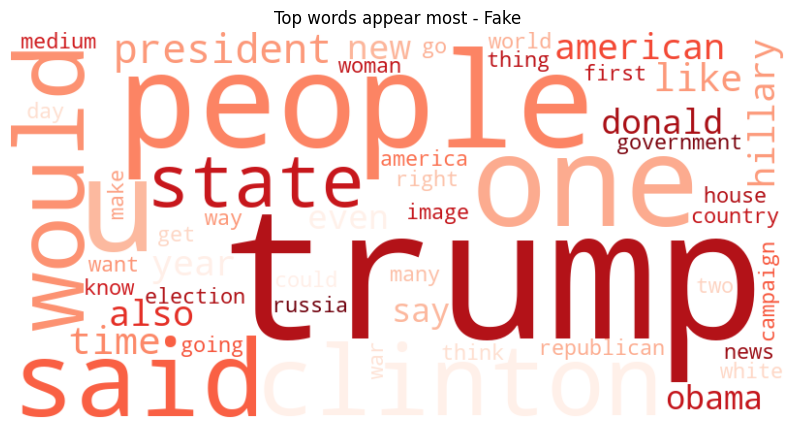

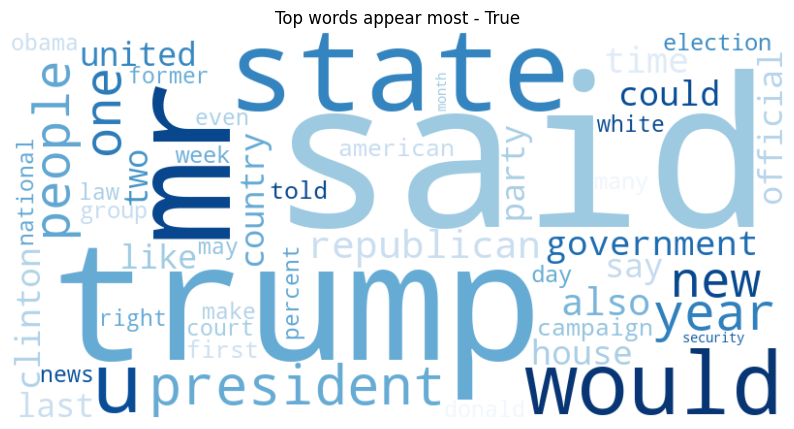

In [180]:
plot_common_words(df, 0, 'Reds')
plot_common_words(df, 1, 'Blues')

Có thể thấy **Fake news** dường như tập trung vào các nhân vật cụ thể (Trump, Clinton, Obama) và các sự kiện nóng như (war, election, russia), điều này có thể ám chỉ rằng **Fake news** thường sử dụng ngôn ngữ kịch tích hoặc tập trung vào các câu chuyện cá nhân/đặc biệt để thu hút sự chú ý. Trong khi đó **True news** có xu hướng sử dụng ngôn ngữ mô tả chung hơn (state, people, goverment) và các từ liên quan đến số liệu/ thông tin chính thức (percent, law, leader, official), phản ánh rằng **True news** thường liên quan đến các báo cáo có căn cứ, số liệu, hoặc thông tin chính thức từ các tổ chức/nhà nước.

#### **Contextual analysis**

Ở đây tôi sẽ kiểm tra xem các từ như "war"/ "election" trong **Fake news** có xuất hiện trong các câu mang tính cáo buộc hay không, so với "law"/ "percent" trong **True news** có liên quan đến báo cáo chunhs thức.

In [181]:
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import defaultdict

nltk.download('averaged_perceptron_tagger')

# Analysize function
def analyze_context(df):
    context_dict = defaultdict(list)
    for index, row in df.iterrows():
        text = row['clean_text']
        label = row['label']
        sentences = sent_tokenize(text) # split the sentence in a text based on '.'/ '!'/ '?'
        for sent in sentences:
            tokens = word_tokenize(sent)
            if label == 0 and any(word.lower() in sent.lower() for word in ['war', 'election']):
                if any(critic_word in sent.lower() for critic_word in ['accuse', 'blame', 'false', 'threat']):
                    context_dict['Fake_accusation'].append(sent)
            elif label == 1 and any(word.lower() in sent.lower() for word in ['law', 'percent']):
                if any(critic_word in sent.lower() for critic_word in ['report', 'official', 'data', 'government']):       
                    context_dict['True_accusation'].append(sent)
                    
    return context_dict

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ngmin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [182]:
context_dict = analyze_context(df)
for key, value in context_dict.items():
    print(f"{key}: {len(value)}")
    print(value[:2])

Fake_accusation: 5136
['many people raised alarm regarding fact donald trump dangerously close becoming autocrat thing democracy become autocracy right people nose often look like democracy beginning phase explained republican david frum couple month donald trump presidency piece atlantic called build autocracy fact really look critically happening right systematic discrediting vital institution free press federal bureau investigation well direct weaponization department justice order go trump former political opponent democratic nominee hillary clinton making autocracy well way one chamber congress house representative already rogue band republican running parallel investigation official russian collusion investigation explicit intent undermining discrediting idea trump could possibly done anything wrong russian order swing election favorall starter trump making united nation ambassador nikki haley bully threaten country united nation voted trump decision change u policy come recognit

C:\Users\ngmin\AppData\Local\Temp\ipykernel_18612\2933273755.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = categories, y = counts, palette = ['red', 'blue'])


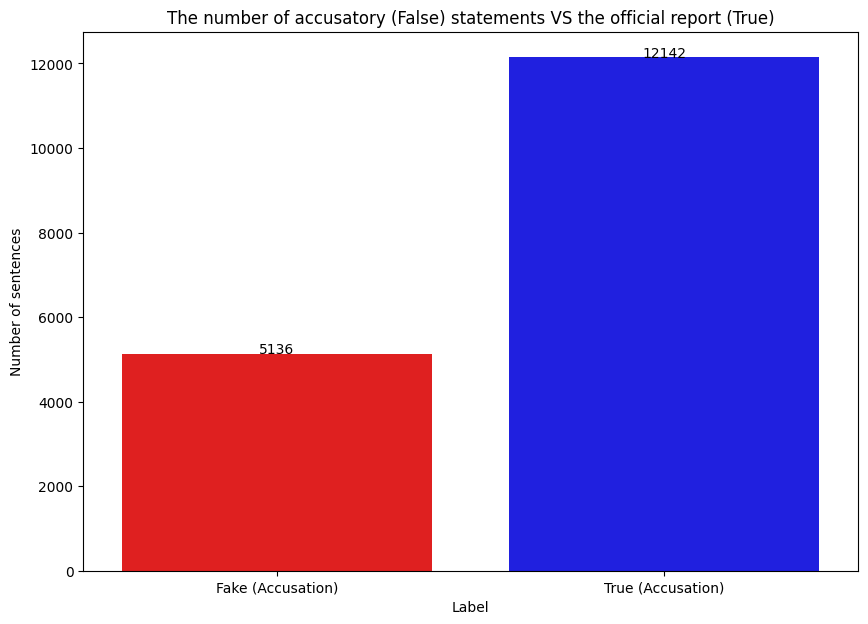

In [183]:
# Count the sentences in each label
fake_accusation_count = len(context_dict.get("Fake_accusation", []))
true_accusation_count = len(context_dict.get("True_accusation", []))

# Data
categories = ['Fake (Accusation)', 'True (Accusation)']
counts = [fake_accusation_count, true_accusation_count]

# Plot the data
plt.figure(figsize = (10, 7))
sns.barplot(x = categories, y = counts, palette = ['red', 'blue'])
plt.title('The number of accusatory (False) statements VS the official report (True)')
plt.ylabel('Number of sentences')
plt.xlabel('Label')
for i, v in enumerate(counts):
    plt.text(i, v + 5, str(v), ha='center')
plt.show()

Có thể thấy số câu mang tính báo cáo chính thức cao gấp đôi so với Fake, cho thấy thông tin chính xác thường dựa trên nguồn chính thống. Còn số câu bên Fake thì thấp hơn đáng kể, ám chỉ thông tin sai lệch hay dùng ngôn ngữ chỉ trích.

#### **Ngrams Analysis**

In [184]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range = (g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

Bigram Analysis

C:\Users\ngmin\AppData\Local\Temp\ipykernel_18612\721407719.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = list(most_common_bi.values()), y = list(most_common_bi.keys()), palette='coolwarm')


Text(0.5, 1.0, 'Most Common Fake News Bigrams')

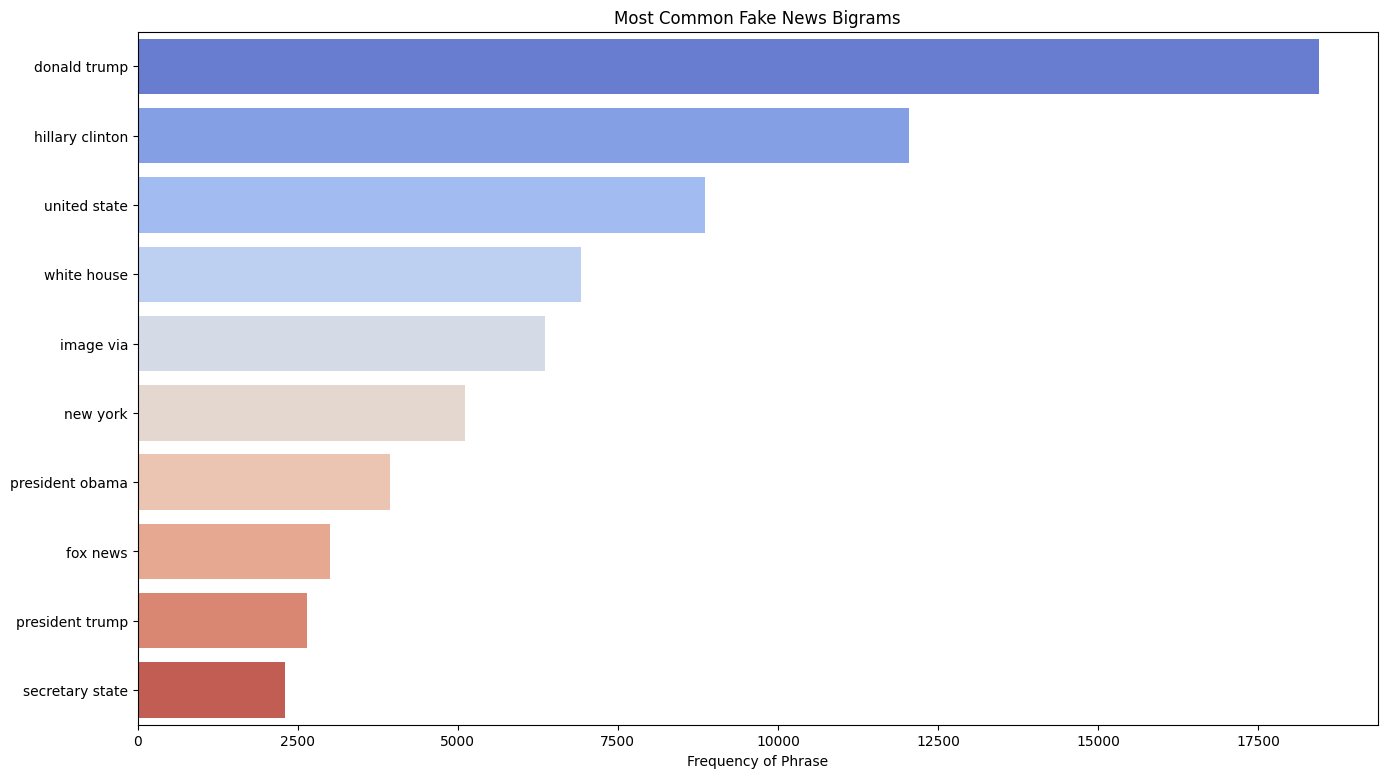

In [185]:
# Fake News
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(df[df['label'] == 0]['clean_text'], 10, 2)
most_common_bi = dict(most_common_bi)
sns.barplot(x = list(most_common_bi.values()), y = list(most_common_bi.keys()), palette='coolwarm')
plt.xlabel('Frequency of Phrase')
plt.title('Most Common Fake News Bigrams')

C:\Users\ngmin\AppData\Local\Temp\ipykernel_18612\1802141657.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = list(most_common_bi.values()), y = list(most_common_bi.keys()), palette = 'plasma')


Text(0.5, 1.0, 'Most Common True News Bigrams')

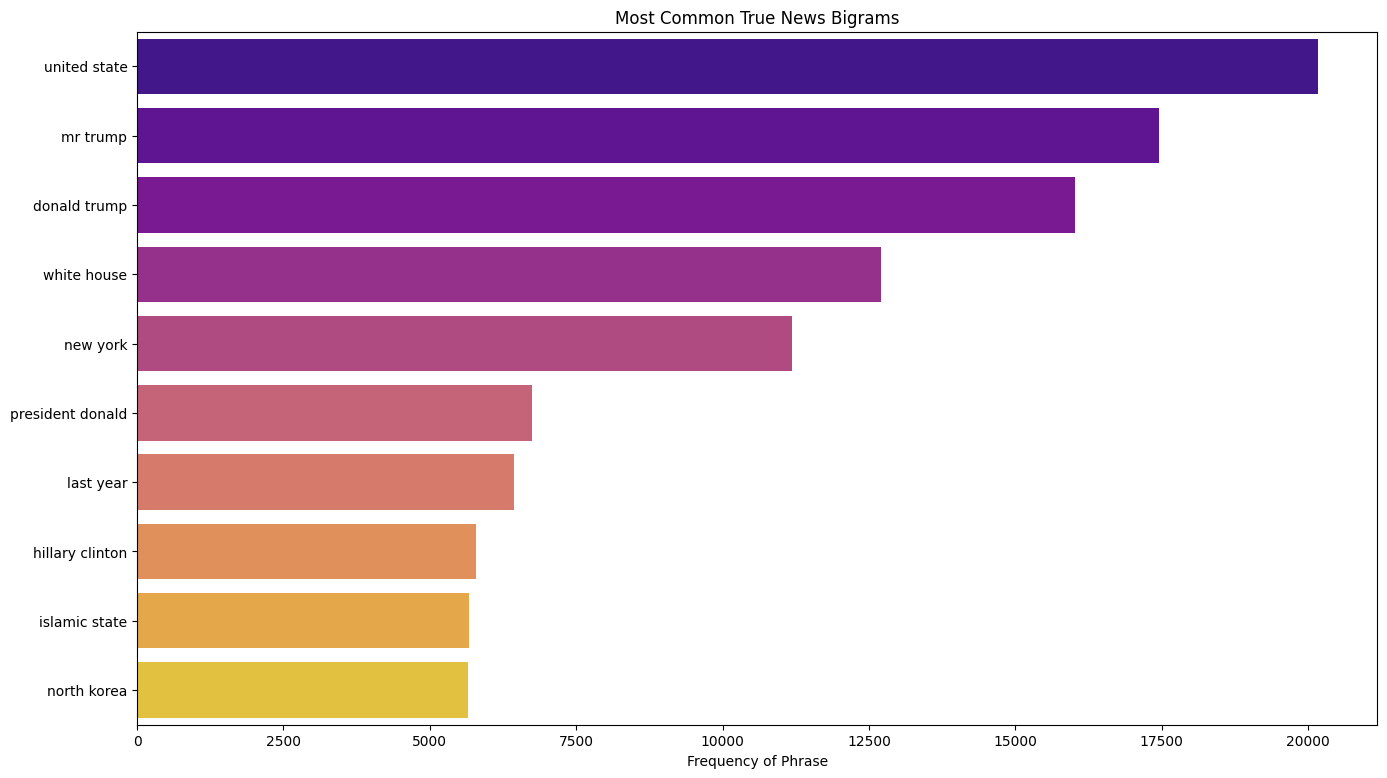

In [186]:
# True News
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(df[df['label'] == 1]['clean_text'], 10, 2)
most_common_bi = dict(most_common_bi)
sns.barplot(x = list(most_common_bi.values()), y = list(most_common_bi.keys()), palette = 'plasma')
plt.xlabel('Frequency of Phrase')
plt.title('Most Common True News Bigrams')

Có thể thấy **Fake News** tập trung vào các nhân vật cụ thể (Trump, Clinton) và nguồn không chính thức (image via). Trong khi đó **True News** nhấn mạnh các thực thể chính phủ (united state, white house) và sự kiện quốc tế (north korea), phù hợp với đặc trưng báo cáo chính thống

Trigram Analysis

C:\Users\ngmin\AppData\Local\Temp\ipykernel_18612\1614904915.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = list(most_common_bi.values()), y = list(most_common_bi.keys()), palette = 'viridis')


Text(0.5, 1.0, 'Most Common Fake News Trigrams')

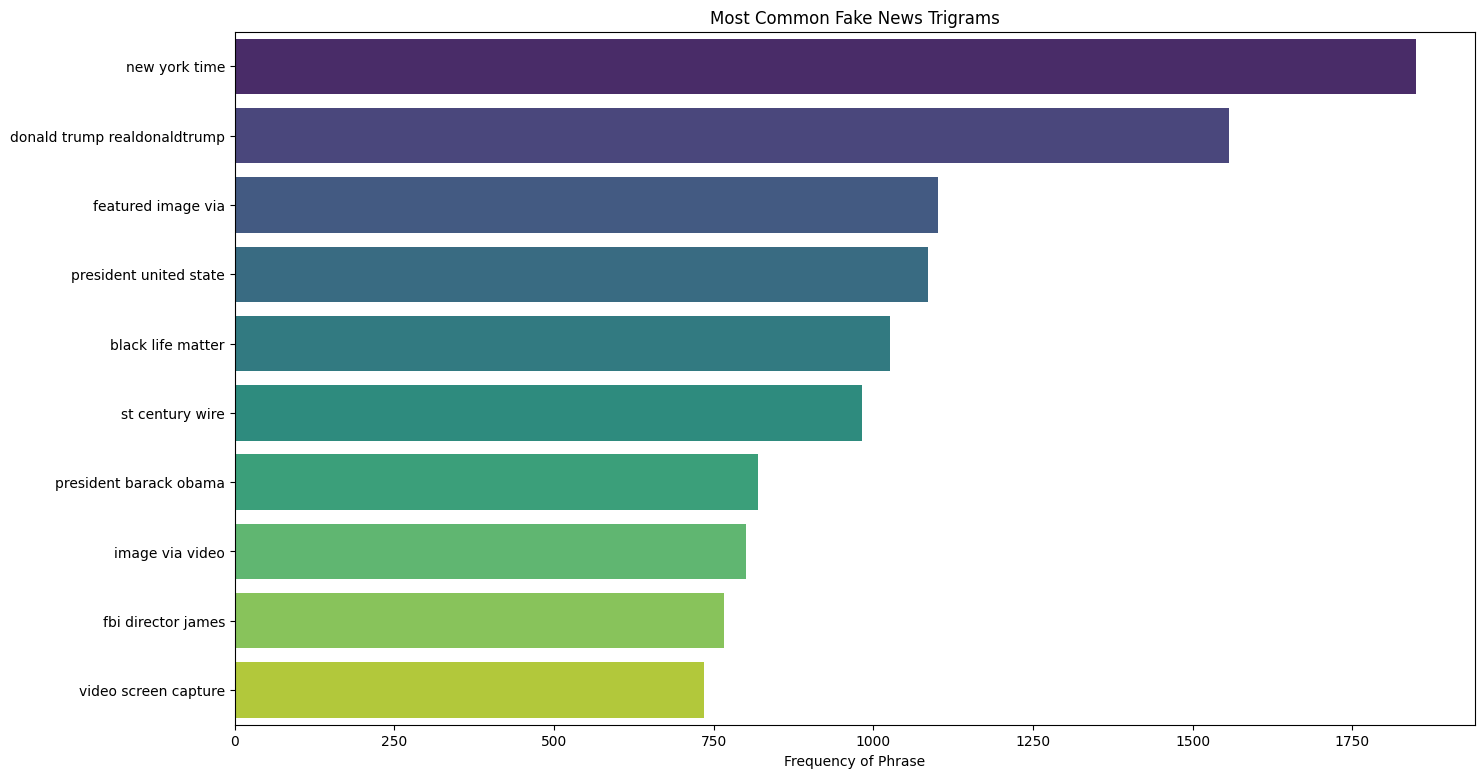

In [187]:
# Fake News
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(df[df['label'] == 0]['clean_text'], 10, 3)
most_common_bi = dict(most_common_bi)
sns.barplot(x = list(most_common_bi.values()), y = list(most_common_bi.keys()), palette = 'viridis')
plt.xlabel('Frequency of Phrase')
plt.title('Most Common Fake News Trigrams')

C:\Users\ngmin\AppData\Local\Temp\ipykernel_18612\817748816.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = list(most_common_bi.values()), y = list(most_common_bi.keys()), palette = 'magma')


Text(0.5, 1.0, 'Most Common True News Trigrams')

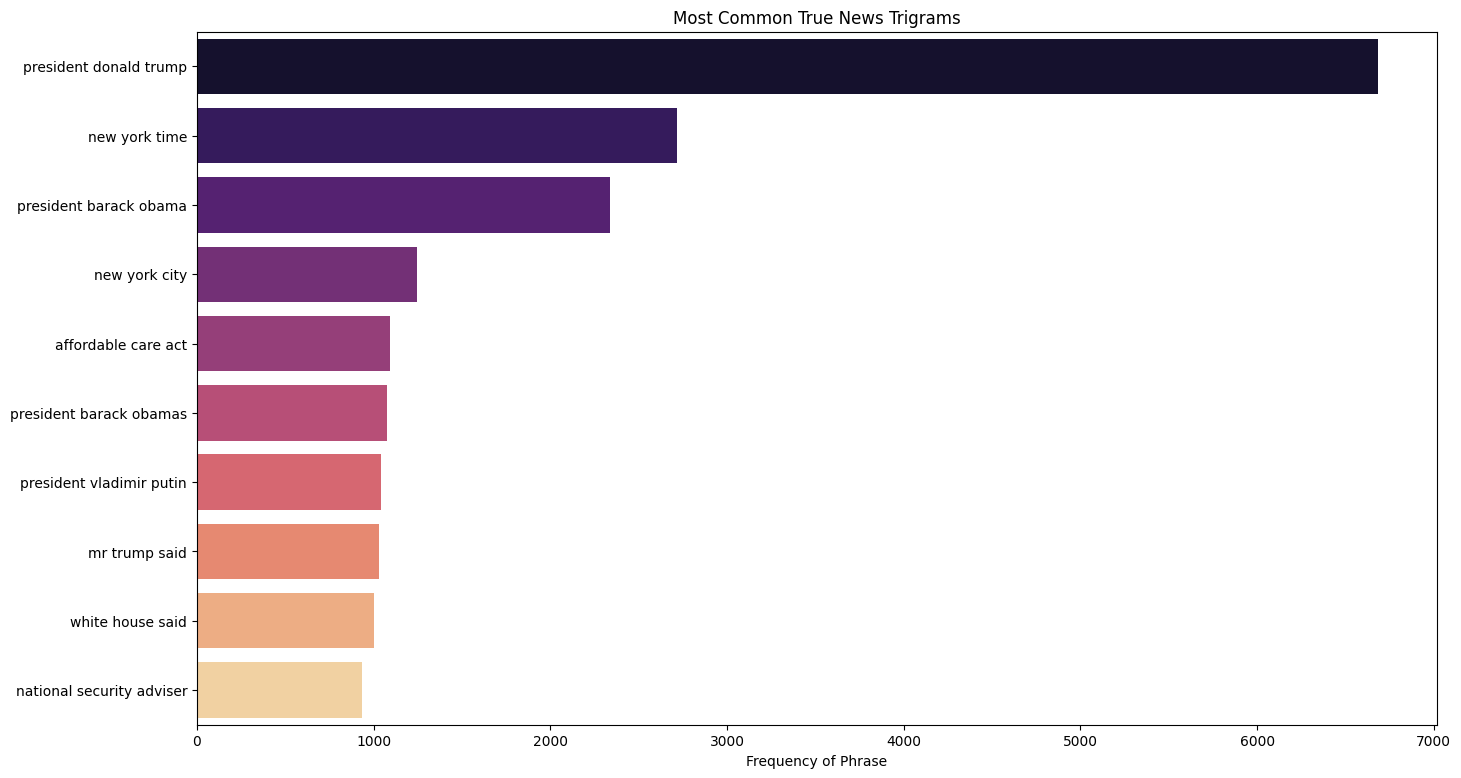

In [188]:
# True News
plt.figure(figsize = (16,9))
most_common_bi = get_top_text_ngrams(df[df['label'] == 1]['clean_text'], 10, 3)
most_common_bi = dict(most_common_bi)
sns.barplot(x = list(most_common_bi.values()), y = list(most_common_bi.keys()), palette = 'magma')
plt.xlabel('Frequency of Phrase')
plt.title('Most Common True News Trigrams')

## **I. Build model with some Machine Learning Models**

## **Model Building**

**1. Choose the best N-gram**

Tôi thực hiện việc so sánh chỉ số F1 score ở đây để chọn ra số n-grams tốt nhất để phục vụ cho việc chuẩn hóa bằng TF-IDF Vectorizer ở bước sau

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

# Prepare the data
X = list(df['clean_text'])
y = list(df['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for n in range(1, 4):
    cv = CountVectorizer(analyzer = 'word', ngram_range = (1, n))
    X_train_cv = cv.fit_transform(X_train)
    X_test_cv = cv.transform(X_test)
    
    clf = MultinomialNB()
    clf.fit(X_train_cv, y_train)
    y_pred = clf.predict(X_test_cv)
    
    score = np.round(f1_score(y_test, y_pred, average = 'micro'), 4)
    print('F-1 score of model with n-gram range of {}: {}'.format((1, n), score))

F-1 score of model with n-gram range of (1, 1): 0.8915
F-1 score of model with n-gram range of (1, 2): 0.8956
F-1 score of model with n-gram range of (1, 3): 0.8851


Có thể thấy ở đây thì n-grams tốt nhất là Bigrams (1, 2)

**2. Add Semantic Features into training set**

In [190]:
# Prepare the data
X = df['clean_text']
y = df['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [191]:
print("The shape of training set:", X_train.shape)
print("The shape of testing set:", X_test.shape)

The shape of training set: (54880,)
The shape of testing set: (13720,)


Ở bước này tôi sẽ chọn **TF-IDF (Term Frequency-Inverse Document Frequency)** là kỹ thuật vectorization để chuẩn hóa text về dạng dữ liệu có cấu trúc có thể phân tích được bằng thuật toán Machine Learning. Thêm vào đó tôi cũng sẽ kết hợp với các kỹ thuật vectorization khác để nắm bắt các đặc điểm dữ liệu của ngôn ngữ và ngữ nghĩa khác nhau. Cụ thể là thêm với 3 tính năng Additional Semantic:<br>
- **Average Sentiment Polarity:** chỉ số này sẽ cho phép đánh giá cảm xúc chung của văn bản, phân loại nó là positive, neutral, hay negative. Phân tích cảm xúc rất quan trọng để phát hiện **Fake news**, thường khai thác các cảm xúc mạnh để đánh lừa người đọc. **Polarity score** là chỉ số sẽ cung cấp thông tin chi tiết về thông diệu cảm xúc của nội dung.

- **Readability Score (Flesch–Kincaid):** chỉ số này sẽ đo lường độ khó của văn bản, các văn bản quá phức tạp hoặc quá đơn giản có thể là dấu hiệu cảnh báo về **Fake news**. Chỉ số này sẽ đánh giá mức độ dễ hiểu của 1 văn bản dựa trên độ dài và độ phức tạp của câu. Đặc điểm này hữu ích để xác định các văn bản có thể được tạo ra để đánh lừa hoặc thao túng người đọc bằng thuật ngữ phức tạp/ ngôn ngữ quá đơn giản.

- **Thematic Diversity:** phân tích sự đa dạng của các chủ đề được đề cập trong văn bản giúp hiểu được sự lan truyền và tầm quan trọng của nội dung, có thể chỉ ra **Fake news** hay là không. Thường thì **Fake news** có thể lặp đi lặp lại 1 chủ đề, thiên vị, ít đa dạng.

In [192]:
# Calculate TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features = 5000, ngram_range = (1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [193]:
X_train_tfidf

<54880x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 8031238 stored elements in Compressed Sparse Row format>

In [194]:
# Calculate Sentiment Polarity
from textblob import TextBlob
def get_sentiment(x):
    try:
        return TextBlob(x).sentiment.polarity
    except:
        return 0
    
sent_train = X_train.apply(get_sentiment).values.reshape(-1, 1)
sent_test = X_test.apply(get_sentiment).values.reshape(-1, 1)

In [195]:
sent_train[:5]

array([[ 0.20833333],
       [ 0.10059524],
       [ 0.07511827],
       [-0.00859375],
       [ 0.07142857]])

In [196]:
# Calculate Readability Score
import textstat
def get_readability(x):
    try:
        return textstat.flesch_kincaid_grade(x)
    except:
        return 0

read_train = X_train.apply(get_readability).values.reshape(-1, 1)
read_test = X_test.apply(get_readability).values.reshape(-1, 1)

In [197]:
read_train[:5]

array([[ 43.89      ],
       [119.89888502],
       [183.08351351],
       [114.61160584],
       [ 36.09176471]])

In [198]:
# Cluster Topic Features (LDA)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

cv = CountVectorizer(max_df = 0.95, min_df = 2)
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

lda = LatentDirichletAllocation(n_components = 5, random_state = 42)
topic_train = lda.fit_transform(X_train_cv)
topic_test = lda.transform(X_test_cv)

In [199]:
topic_train[:5]

array([[2.26957255e-03, 2.29810397e-03, 4.69880948e-02, 9.46133432e-01,
        2.31079619e-03],
       [1.07520872e-01, 7.18433933e-04, 7.12050314e-04, 7.42982384e-01,
        1.48066260e-01],
       [4.68131528e-04, 4.66089813e-04, 4.65449854e-04, 8.04834925e-01,
        1.93765404e-01],
       [7.74677263e-04, 6.25630390e-01, 6.36199975e-02, 7.75611159e-04,
        3.09199324e-01],
       [9.87747872e-01, 3.05006687e-03, 3.10324576e-03, 3.02406156e-03,
        3.07475380e-03]])

Với sparse matrix của TF-IDF sau khi chuẩn hóa thì đã nằm trong khoảng [0, 1] rồi nhưng với 3 Semantics Features thì chưa cùng 1 range với nhau có thể thấy ở trên.<br>
- **Sentiment Polarity**: giá trị có thể âm/dương, range nhỏ.

- **Readability Score**: giá trị có thể lớn hơn TF-IDF rất nhiều

- **LDA Topic Vector**: đều là xác suất, có thể scale để đồng đều với TF-IDF

In [200]:
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

# Combine 3 semantic features
semantic_train = np.hstack([sent_train, read_train, topic_train])
semantic_test  = np.hstack([sent_test, read_test, topic_test])

# Scale semantic train and test
scaler = StandardScaler()

semantic_train_scaled = scaler.fit_transform(semantic_train)
semantic_test_scaled = scaler.transform(semantic_test)

# Merge TF-IDF sparse matrix with 3 semantic features
X_train_final = hstack([X_train_tfidf, semantic_train_scaled])
X_test_final = hstack([X_test_tfidf, semantic_test_scaled])

In [201]:
print("The shape of training data after applying TF-IDF and adding 3 semantic features:", X_train_final.shape)

The shape of training data after applying TF-IDF and adding 3 semantic features: (54880, 5007)


**3. Make a pipeline for training different models**

In [202]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score

# Make a list to store all the names of model training and accuracy
models = []
accuracy = []
f1_train = []
f1_test = []

# Build model function
def build_model(ml_model, X_train, y_train, X_test, y_test, accuracy, f1_train, f1_test):
    # Fit the model
    ml_model.fit(X_train, y_train)
    
    # Calculate scores 
    y_pred = ml_model.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    f1_test.append(f1_score(y_test, y_pred))
    f1_train.append(f1_score(y_train, ml_model.predict(X_train)))
    
    # Print classification report
    print(classification_report(y_test, y_pred))

## **Model Training**

#### **Decision Tree**

In [203]:
from sklearn.tree import DecisionTreeClassifier

print("Decision Tree Classifier...")
models.append("Decision Tree Classifier")
build_model(DecisionTreeClassifier(random_state = 42), X_train_final, y_train, X_test_final, y_test, accuracy, f1_train, f1_test)

Decision Tree Classifier...
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6860
           1       0.87      0.87      0.87      6860

    accuracy                           0.87     13720
   macro avg       0.87      0.87      0.87     13720
weighted avg       0.87      0.87      0.87     13720



#### **Logistic Regression**

In [204]:
from sklearn.linear_model import LogisticRegression

print("Logistic Regression...")
models.append("Logistic Regression")
build_model(LogisticRegression(solver = 'liblinear', max_iter = 1000, random_state = 42), X_train_final, y_train, X_test_final, y_test, accuracy, f1_train, f1_test)

Logistic Regression...
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6860
           1       0.94      0.94      0.94      6860

    accuracy                           0.94     13720
   macro avg       0.94      0.94      0.94     13720
weighted avg       0.94      0.94      0.94     13720



#### **Support Vector Machine (SVM) Model**

In [205]:
from sklearn.svm import LinearSVC

print("Support Vector Machine (SVM) Model...")
models.append("Support Vector Machine (SVM) Model")
build_model(LinearSVC(C=1.0, random_state = 42), X_train_final, y_train, X_test_final, y_test, accuracy, f1_train, f1_test)

Support Vector Machine (SVM) Model...
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6860
           1       0.94      0.94      0.94      6860

    accuracy                           0.94     13720
   macro avg       0.94      0.94      0.94     13720
weighted avg       0.94      0.94      0.94     13720



#### **Random Forest Classifier**

In [206]:
from sklearn.ensemble import RandomForestClassifier

print("Random Forest Classifier...")
models.append("Random Forest Classifier")
build_model(RandomForestClassifier(random_state = 42), X_train_final, y_train, X_test_final, y_test, accuracy, f1_train, f1_test)

Random Forest Classifier...
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      6860
           1       0.92      0.94      0.93      6860

    accuracy                           0.93     13720
   macro avg       0.93      0.93      0.93     13720
weighted avg       0.93      0.93      0.93     13720



#### **Naive Bayes Classifier**

In [207]:
from sklearn.naive_bayes import MultinomialNB

print("Multinomial Naive Bayes Classifier...")
models.append("Multinomial Naive Bayes Classifier")
build_model(MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test, accuracy, f1_train, f1_test)

Multinomial Naive Bayes Classifier...
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      6860
           1       0.86      0.84      0.85      6860

    accuracy                           0.85     13720
   macro avg       0.85      0.85      0.85     13720
weighted avg       0.85      0.85      0.85     13720



#### **Compare Models**

In [208]:
all_models_ml = pd.DataFrame({
                            "Model": models,
                            "Accuracy": accuracy,
                            "F1-Score of Testing": f1_test,
                            "F1-Score of Training": f1_train})

all_models_ml.sort_values(by = ['Accuracy', 'F1-Score of Testing', 'F1-Score of Training'], ascending = False)

,Model,Accuracy,F1-Score of Testing,F1-Score of Training
2,Support Vector Machine (SVM) Model,0.940160,0.940051,0.968486
1,Logistic Regression,0.938703,0.938537,0.950579
3,Random Forest Classifier,0.929227,0.929806,0.999964
0,Decision Tree Classifier,0.869461,0.869184,0.999964
4,Multinomial Naive Bayes Classifier,0.850437,0.849029,0.856992


Có thể nhìn qua **Accuracy** và chỉ số **F1-Score** là chỉ số chính mà tôi dùng để đánh giá model thì **Support Vector Machine (SVM)** là model cho hiệu suất **tốt nhất** cũng như là **ổn định nhất** trong 3 models còn lại. Vì vậy tôi sẽ chọn nó là model tốt nhất và dùng nó cho bước đánh giá sau và thử nghiệm thử trên vài dữ liệu thật tế.

## **Performance Evaluation**

#### **Confusion Maxtrix**

Text(0.5, 1.0, 'Confusion Matrix - SVM Model')

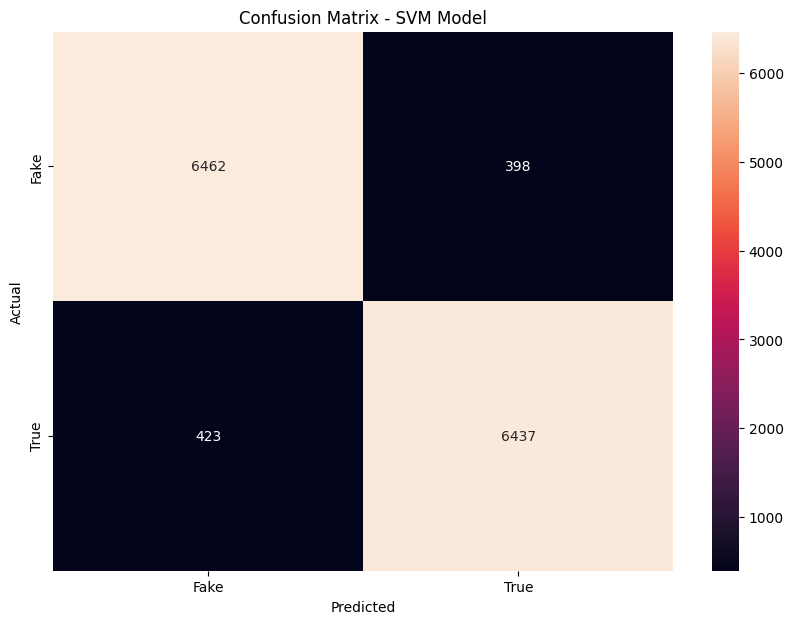

In [209]:
from sklearn.metrics import confusion_matrix

# Take the best model
best_model = LinearSVC(C=1.0, random_state = 42).fit(X_train_final, y_train)
y_pred_best = best_model.predict(X_test_final)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'd',
            xticklabels = ['Fake', 'True'],
            yticklabels = ['Fake', 'True'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM Model")

#### **Cross-validation**

In [210]:
from sklearn.model_selection import cross_val_score

best_model = LinearSVC(C=1.0, random_state = 42)
scores = cross_val_score(best_model, X_train_final, y_train, cv = 5, scoring = 'f1')
print(f"F1-SV Score: {scores.mean(): .4f} +/- {scores.std():.4f}") 

F1-SV Score:  0.9416 +/- 0.0023


Ở đây tôi sẽ sử dụng **Statified K-Fold CV** để đánh giá tổng quan nhất cho model, nó là 1 phiên bản nâng cấp của K-Fold CV. Với phương pháp này thì nó chỉ sẽ shuffle dữ liệu 1 lần trước khi bắt đầu chia fold và nó sẽ cố gắng chia sao cho tỷ lệ các class trong các fold đều là tương đồng nhau.

In [211]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
skf

StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [212]:
fold_idx = 1
acc_list = []
f1_list = []
best_model = LinearSVC(C=1.0, random_state = 42)

# Chuyển sparse matrix về dạng hỗ trợ indexing
X_train_final = X_train_final.tocsr()

for train_ids, val_ids in skf.split(X_train_final, y_train):
    # Apply StratifiedKFold
    X_fold_train = X_train_final[train_ids]
    y_fold_train = y_train.iloc[train_ids]  

    X_fold_val = X_train_final[val_ids]
    y_fold_val = y_train.iloc[val_ids]
    
    # Fit the model
    best_model.fit(X_fold_train, y_fold_train)
    y_pred = best_model.predict(X_fold_val)
    
    # Evaluate model
    acc_list.append(accuracy_score(y_fold_val, y_pred))
    f1_list.append(f1_score(y_fold_val, y_pred))
    
    fold_idx += 1

In [213]:
print("Detail in each folds")
for i in range(0, len(acc_list)):
    print(f"Fold {i+1} - Accuracy: {acc_list[i]} - F1_score: {f1_list[i]}")
    
print("\nOverall assessment of the folds:")
print(f"> Accuracy: {np.mean(acc_list)} (+/- {np.std(acc_list)})")
print(f"> F1-Score: {np.mean(f1_list)} (+/- {np.std(f1_list)})")

Detail in each folds
Fold 1 - Accuracy: 0.9393221574344023 - F1_score: 0.9398265269244669
Fold 2 - Accuracy: 0.9443330903790087 - F1_score: 0.9447908195536279
Fold 3 - Accuracy: 0.9385021865889213 - F1_score: 0.9388199039245899
Fold 4 - Accuracy: 0.9412354227405247 - F1_score: 0.9418237575538919
Fold 5 - Accuracy: 0.9406887755102041 - F1_score: 0.941293173415096

Overall assessment of the folds:
> Accuracy: 0.9408163265306122 (+/- 0.002007352675498596)
> F1-Score: 0.9413108362743344 (+/- 0.0020387055725086555)


Có thể thấy giao động rất nhỏ (+/- 0.002), cho thấy mô hình rất ổn định và không phụ thuộc vào cách chia fold

## **Infer Model**

In [214]:
def predict_fake_news(text, model):
    # Clean text first
    cleaned_text = preprocess_text(text)
    
    # Calculate TF-IDF + Adding Senmantic features
    tfidf_vec = tfidf.transform([cleaned_text])
    sen_vec = np.array([[get_sentiment(text)]])
    read_vec = np.array([[get_readability(text)]])
    topic_vec = lda.transform(cv.transform([cleaned_text]))
    
    # Scale semantic vectors
    semantic_vec = np.hstack([sen_vec, read_vec, topic_vec])
    scaled_semantic_vec = scaler.transform(semantic_vec)
    
    # Combine 
    final_input = hstack([tfidf_vec, scaled_semantic_vec])
    
    # Predict
    predict = model.predict(final_input)
    if predict[0] == 0:
        return "The New is FAKE!"
    else:
        return "The NEW is TRUE!"

In [215]:
df['text'][43642]

'The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific researc

In [216]:
df['label'][43642]

1

In [217]:
test_text = df['text'][43642]
predict_fake_news(test_text, best_model)

'The NEW is TRUE!'

In [218]:
test_text1 = "A secret government document leaked online reveals that the COVID-19 pandemic was entirely fabricated to allow mass surveillance via 5G towers. Scientists involved in vaccine development are part of a larger plan to control global behavior."
predict_fake_news(test_text1, best_model)

'The New is FAKE!'

In [219]:
test_text2 = "The U.S. unemployment rate dropped to 3.9% in May 2025, according to the Bureau of Labor Statistics. Job gains were strongest in the tech, healthcare, and energy sectors."
predict_fake_news(test_text2, best_model)

'The NEW is TRUE!'

In [220]:
test_text3 = "New Harvard study finds that drinking 10 cups of coffee a day can completely cure Alzheimer’s. Scientists are urging patients to replace medication with natural alternatives like caffeine and turmeric."
predict_fake_news(test_text3, best_model)

'The New is FAKE!'

In [221]:
test_text4 = "The CDC announced today that the flu vaccine for the 2024-2025 season is proving to be 68% effective against the most common strains so far this year. Public health experts urge people to get vaccinated, especially children, the elderly, and those with chronic conditions."
predict_fake_news(test_text4, best_model)

'The New is FAKE!'

## **II. Build model with Word2Vec + LSTM Model**

## **Model Building**

#### **1. Word2Vec Embedding**

Đưa text sau khi đã được preprocessing vào model Word2Vec để học tạo ra embedding cho mỗi từ cũng như mô hình Word2Vec này cũng giúp model học được các nào có những đặc trưng giống nhau

In [222]:
# Prepare the data
X = [x.split() for x in df['clean_text'].tolist()]
y = df['label'].values

In [223]:
print(X[0])

['donald', 'trump', 'wish', 'american', 'happy', 'new', 'year', 'leave', 'instead', 'give', 'shout', 'enemy', 'hater', 'dishonest', 'fake', 'news', 'medium', 'former', 'reality', 'show', 'star', 'one', 'job', 'country', 'rapidly', 'grows', 'stronger', 'smarter', 'want', 'wish', 'friend', 'supporter', 'enemy', 'hater', 'even', 'dishonest', 'fake', 'news', 'medium', 'happy', 'healthy', 'new', 'year', 'president', 'angry', 'pant', 'tweeted', 'great', 'year', 'america', 'country', 'rapidly', 'grows', 'stronger', 'smarter', 'want', 'wish', 'friend', 'supporter', 'enemy', 'hater', 'even', 'dishonest', 'fake', 'news', 'medium', 'happy', 'healthy', 'new', 'year', 'great', 'year', 'america', 'donald', 'j', 'trump', 'realdonaldtrump', 'december', 'trump', 'tweet', 'went', 'welll', 'expectwhat', 'kind', 'president', 'sends', 'new', 'year', 'greeting', 'like', 'despicable', 'petty', 'infantile', 'gibberish', 'trump', 'lack', 'decency', 'even', 'allow', 'rise', 'gutter', 'long', 'enough', 'wish', '

In [224]:
import gensim 

EMBEDDING_DIM = 100
w2v_model = gensim.models.Word2Vec(sentences = X, vector_size = EMBEDDING_DIM, window = 10, min_count = 1)

In [225]:
len(w2v_model.wv)

308304

In [226]:
w2v_model.wv['trump'].shape

(100,)

In [227]:
w2v_model.wv.most_similar('obama')

[('obamas', 0.9146325588226318),
 ('obamathe', 0.7910693883895874),
 ('datawe', 0.7459406852722168),
 ('obamatook', 0.7353270649909973),
 ('dataor', 0.7329187393188477),
 ('obamaif', 0.7267743349075317),
 ('obamaflynn', 0.7217108011245728),
 ('megafundraiser', 0.7212927341461182),
 ('obamapeople', 0.7140495181083679),
 ('protesterswas', 0.7117219567298889)]

#### **2. Tokenization + Padding**

Ở bước này, mỗi câu sẽ được chuyển thành danh sách chỉ số nguyên tương ứng với các từ trong từ điển đã được xây dựng từ dữ liệu huấn luyện. Sau đó, thực hiện padding để chuẩn hóa độ dài các câu về một kích thước cố định (maxlen), đảm bảo tất cả đầu vào có cùng định dạng. Nếu một câu ngắn hơn maxlen, hệ thống sẽ thêm số 0 (padding) vào cuối câu để đạt đủ độ dài. Còn nếu một câu dài hơn maxlen, hệ thống sẽ cắt bớt từ ở cuối để đưa về đúng kích thước. Việc chuẩn hóa như vậy là cần thiết để đảm bảo dữ liệu đầu vào có shape đồng nhất, phù hợp với yêu cầu của các mô hình Deep Learning.

In [228]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [229]:
# Tokenization
tokenizer = Tokenizer(num_words = 8000, oov_token = '<OOV>')
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)

In [230]:
# tokenizer.word_index

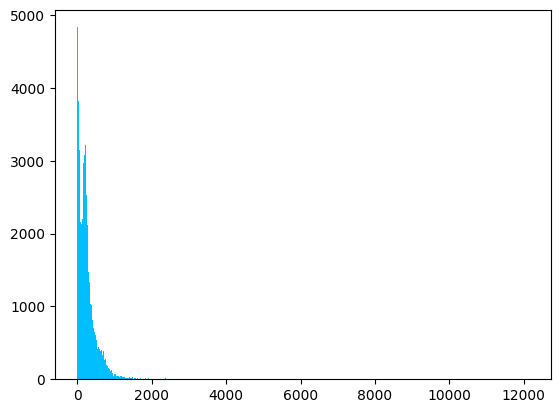

In [231]:
plt.hist([len(x) for x in X], bins = 700)
plt.show()

In [232]:
nos = np.array([len(x) for x in X])
len(nos[nos > 1000])

1494

In [233]:
# Padding
maxlen = 700

X = pad_sequences(X, maxlen = maxlen)

#### **3. Generate mapping matrix from Word2Vec (Embedding Matrix)**

Ở bước này, tôi sử dụng model **Word2Vec đã huấn luyện trước** để tạo ra ma trận embedding (embedding_matrix), trong đó mỗi hàng tương ứng với **một từ trong từ điển tokenizer** và chứa **vector biểu diễn ngữ nghĩa** của từ đó (embedding vector).

In [238]:
word_index = tokenizer.word_index

In [241]:
word_index

{'<OOV>': 1,
 'said': 2,
 'trump': 3,
 'state': 4,
 'would': 5,
 'u': 6,
 'people': 7,
 'mr': 8,
 'one': 9,
 'president': 10,
 'year': 11,
 'clinton': 12,
 'new': 13,
 'time': 14,
 'also': 15,
 'republican': 16,
 'like': 17,
 'american': 18,
 'government': 19,
 'could': 20,
 'say': 21,
 'country': 22,
 'house': 23,
 'campaign': 24,
 'donald': 25,
 'even': 26,
 'election': 27,
 'two': 28,
 'united': 29,
 'many': 30,
 'obama': 31,
 'first': 32,
 'last': 33,
 'day': 34,
 'right': 35,
 'party': 36,
 'white': 37,
 'make': 38,
 'news': 39,
 'get': 40,
 'told': 41,
 'official': 42,
 'hillary': 43,
 'group': 44,
 'way': 45,
 'law': 46,
 'may': 47,
 'know': 48,
 'want': 49,
 'world': 50,
 'week': 51,
 'going': 52,
 'think': 53,
 'political': 54,
 'made': 55,
 'former': 56,
 'take': 57,
 'national': 58,
 'back': 59,
 'woman': 60,
 'vote': 61,
 'medium': 62,
 'million': 63,
 'percent': 64,
 'russia': 65,
 'since': 66,
 'police': 67,
 'well': 68,
 'security': 69,
 'court': 70,
 'go': 71,
 'thing':

In [243]:
# Function to create weight maxtrix from Word2Vec model
def get_weight_matrix(model, vocab):
    # Total vocab size + 0 for unknown words
    vocab_size = len(vocab) + 1
    
    # Define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    
    # Step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        if word in model.wv:
            weight_matrix[i] = model.wv[word]
        
    return weight_matrix

In [244]:
embedding_vectors = get_weight_matrix(w2v_model, word_index)

In [252]:
vocab_size = len(word_index) + 1

## **Hyperparameter set up**

In [257]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential()

# Non-trainable embedding layer
model.add(Embedding(input_dim = vocab_size, output_dim = EMBEDDING_DIM, weights = [embedding_vectors], input_length = maxlen, trainable = False))

# LSTM 
model.add(LSTM(128, return_sequences = False))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model.build(input_shape=(None, maxlen))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 700, 100)       │    30,830,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,947,977 (118.06 MB)

 Trainable params: 117,377 (458.50 KB)

 Non-trainable params: 30,830,600 (117.61 MB)

## **Model Training**

In [259]:
from sklearn.model_selection import train_test_split

# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 10)

Epoch 1/10
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 562s 434ms/step - accuracy: 0.8761 - loss: 0.2886 - val_accuracy: 0.9377 - val_loss: 0.1685
Epoch 2/10
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 692s 538ms/step - accuracy: 0.9378 - loss: 0.1587 - val_accuracy: 0.9371 - val_loss: 0.1709
Epoch 3/10
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 749s 582ms/step - accuracy: 0.9533 - loss: 0.1223 - val_accuracy: 0.9464 - val_loss: 0.1371
Epoch 4/10
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 766s 595ms/step - accuracy: 0.9666 - loss: 0.0901 - val_accuracy: 0.9532 - val_loss: 0.1248
Epoch 5/10
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 781s 607ms/step - accuracy: 0.9741 - loss: 0.0731 - val_accuracy: 0.9536 - val_loss: 0.1314
Epoch 6/10
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 816s 634ms/step - accuracy: 0.9828 - loss: 0.0496 - val_accuracy: 0.9558 - val_loss: 0.1260
Epoch 7/10
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 817s 635ms/step - accuracy: 0.9887 - loss: 0.0359 - val_accuracy: 0.9545 - val_loss: 0.1441
Epoch 8/10
1287/1287 ━━━━━━━━━━━━━━━━━━━━ 829s 644ms/step - ac

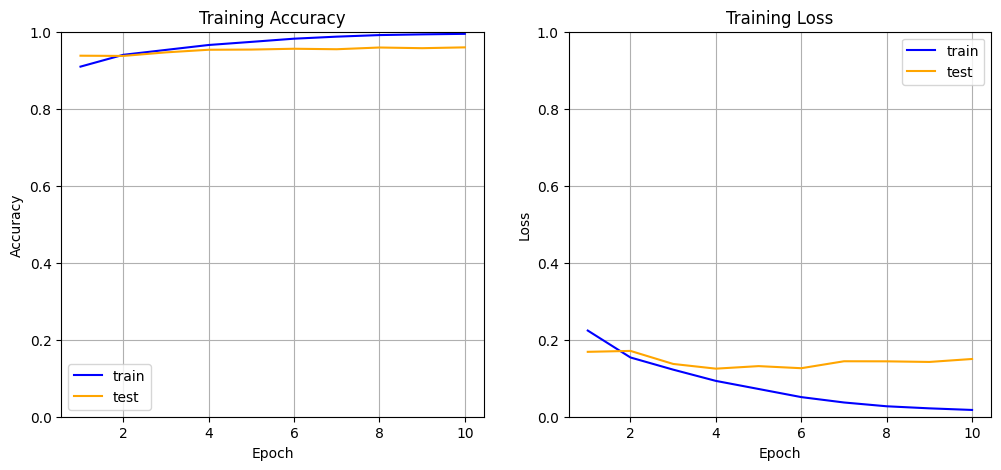

In [261]:
# Take the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

# Fake News Detection Accuracy
ax1.plot(epochs, acc, label = 'train', color = 'blue')
ax1.plot(epochs, val_acc, label = 'test', color = 'orange')
ax1.set_title("Training Accuracy")
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Epoch")
ax1.legend()
ax1.set_ylim([0, 1])
ax1.grid(True)

# Fake News Detection Loss
ax2.plot(epochs, loss, label = 'train', color = 'blue')
ax2.plot(epochs, val_loss, label = 'test', color = 'orange')
ax2.set_title("Training Loss")
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epoch")
ax2.legend()
ax2.set_ylim([0, 1])
ax2.grid(True)

In [264]:
model.evaluate(X_test, y_test)

536/536 ━━━━━━━━━━━━━━━━━━━━ 80s 148ms/step - accuracy: 0.9616 - loss: 0.1502


[0.15489235520362854, 0.9599999785423279]

In [265]:
y_pred = model.predict(X_test)
y_pred[:5]

536/536 ━━━━━━━━━━━━━━━━━━━━ 91s 170ms/step


array([[9.9753296e-01],
       [9.9999875e-01],
       [3.5379774e-08],
       [4.8623106e-09],
       [2.2419484e-03]], dtype=float32)

In [268]:
y_pred_lstm = []

for val in y_pred:
    if val >= 0.5:
        y_pred_lstm.append(1)
    else:
        y_pred_lstm.append(0)

In [269]:
y_pred_lstm[:5]

[1, 1, 0, 0, 0]

In [271]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lstm))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8537
           1       0.96      0.96      0.96      8613

    accuracy                           0.96     17150
   macro avg       0.96      0.96      0.96     17150
weighted avg       0.96      0.96      0.96     17150



Mô hình **Word2Vec + LSTM** đạt được độ chính xác khá ấn tượng là 96% trên tập testing, cùng với đó là chỉ số precision và recall cũng ngang nhau trên tập training lẫn testing. Chỉ số F1-Score cũng cân bằng cho thấy mô hình tổng quát hóa tốt và nắm bắt hiệu quả các semantic cũng như là contextual trong text. Kết quả này tốt hơn so với các mô hình Machine Learning thông thường kể cả là mô hình tốt nhất.

## **Performance Evaluation**

#### **Confusion matrix**

Text(0.5, 1.0, 'Confusion Matrix - Word2Vec + LSTM model')

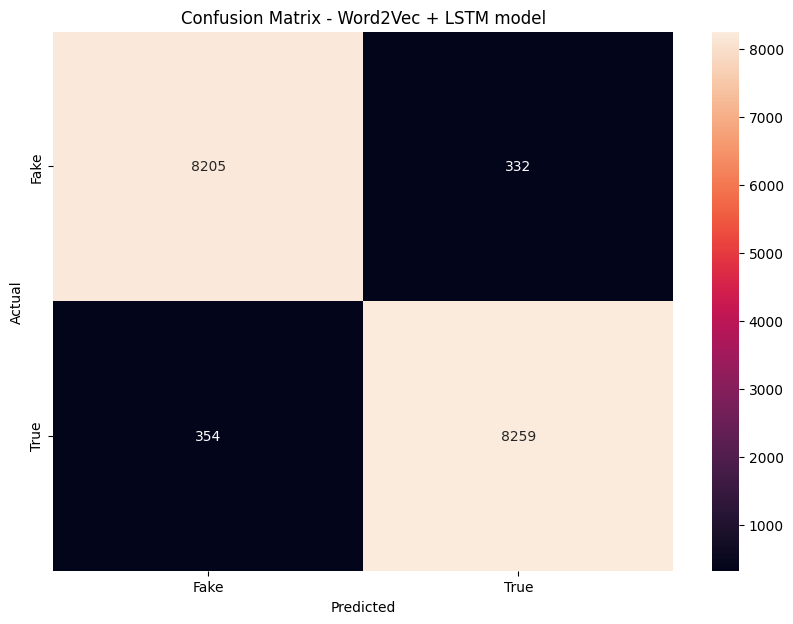

In [272]:
from sklearn.metrics import confusion_matrix

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_lstm)

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'd',
            xticklabels = ['Fake', 'True'],
            yticklabels = ['Fake', 'True'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Word2Vec + LSTM model")

## **Infer Model**

In [284]:
def predict_fake_news_lstm_model(text, model, tokenizer, maxlen = 700):
    # Clean the text first
    cleaned_text = preprocess_text(text)
    
    # Tokenization + Padding 
    seq = tokenizer.texts_to_sequences([cleaned_text])
    padding = pad_sequences(seq, maxlen = maxlen)
    
    # Predict 
    predict = model.predict(padding)[0][0]
    
    if predict < 0.5:
        return "The New is FAKE!"
    else:
        return "The New is TRUE!"

In [ ]:
df['text'][50] # Fake

'Jared Kushner, senior White House adviser and son-in-law of President Donald Trump, was interviewed by special counsel Robert Mueller s office at the beginning of November, according to a source familiar with the process. As part of an interview that lasted approximately 90 minutes, Kushner was quizzed mainly on his interactions, meetings, and any general contact he had with former national security adviser Michael Flynn, as well as his son, in regards to Flynn s private business dealings with his firm, Flynn Intel Group. Mr. Kushner has voluntarily cooperated with all relevant inquiries and will continue to do so,  Kushner s attorney, Abbe Lowell, said in a statement given to NBC News.The news of Kushner s interview first came to light when grand jury testimony related to Flynn s private business dealings was postponed by prosecutors working for Mueller, the reason for which is still unclear. This postponement came just a week after Flynn s attorneys alerted President Trump s legal t

In [279]:
df['label'][50]

0

In [280]:
sample = df['text'][50]
predict_fake_news_lstm_model(sample, model, tokenizer, maxlen = 700)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


'The New is FAKE!'

In [287]:
sample_1 = "The U.S. unemployment rate dropped to 3.9% in May 2025, according to the Bureau of Labor Statistics. Job gains were strongest in the tech, healthcare, and energy sectors."
predict_fake_news_lstm_model(sample_1, model, tokenizer, maxlen=700)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


'The New is TRUE!'